# Inference модели

In [1]:
from ultralytics import YOLO
import cv2
import supervision as sv

In [2]:
image_path = "/home/lastinm/PROJECTS/credit_cards_detection/artefacts/2_0.93_AgACAgIAAxkBAAICb2gDc1odBGUeYrwLDCqbVKbzKukKAALx7jEb9jsYSCYoYdOUlI6-AQADAgADeAADNgQ.jpeg"
#image_path = '/home/lastinm/PROJECTS/credit_cards_detection/artefacts/3_0.91_AgACAgIAAxkBAAICb2gDc1odBGUeYrwLDCqbVKbzKukKAALx7jEb9jsYSCYoYdOUlI6-AQADAgADeAADNgQ.jpeg'
#image_path = '/home/lastinm/PROJECTS/credit_cards_detection/artefacts/1_0.91_AgACAgIAAxkBAAICb2gDc1odBGUeYrwLDCqbVKbzKukKAALx7jEb9jsYSCYoYdOUlI6-AQADAgADeAADNgQ.jpeg'

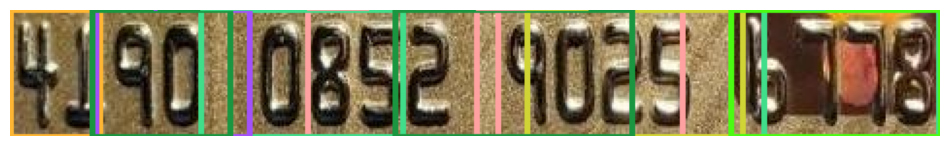

In [6]:
model = YOLO('/home/lastinm/PROJECTS/credit_cards_detection/notebooks/runs/detect/train/weights/best.pt')
image = cv2.imread(image_path)
# Преобразование в чёрно-белое
#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)